In [1]:
import nltk

In [55]:
from nltk.book import *
import pandas as pd
import requests

In [5]:
dir(text4) 

['_CONTEXT_RE',
 '_COPY_TOKENS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_context',
 '_train_default_ngram_lm',
 'collocation_list',
 'collocations',
 'common_contexts',
 'concordance',
 'concordance_list',
 'count',
 'dispersion_plot',
 'findall',
 'generate',
 'index',
 'name',
 'plot',
 'readability',
 'similar',
 'tokens',
 'unicode_repr',
 'vocab']

In [6]:
inauguralFreqs = nltk.FreqDist(text4) 

In [7]:
# Manually
# counts = {}
# for word in text4: 
#     if word not in counts: 
#         counts[word] = 1
#     else: 
#         counts[word] += 1 

In [ ]:
inauguralFreqs

Tokens :: individual instances of a word
Types :: words themselves, not instances

"the the the the the that's all folks" 
tokens = 5 "the", 3 others = 8 tokens
types = 4 types

set() function: takes a list and returns unique items. 

calculate types with set() on a list

samples = types
outcomes = tokens

In [8]:
porkyWords = "the the the the the that's all folks".split()

In [9]:
porkyWords

['the', 'the', 'the', 'the', 'the', "that's", 'all', 'folks']

In [10]:
len(porkyWords) 

8

In [11]:
len(set(porkyWords))

4

Type/token ratio: 
 - often a caculation of vocabulary
 - really sensitive to word count
 - only useful if you're comparing of same number of words across texts

In [27]:
inauguralFileIDs = nltk.corpus.inaugural.fileids()
inauguralWords = [nltk.corpus.inaugural.words(fileid) for fileid in inauguralFileIDs]
inauguralFreqs = [nltk.FreqDist(words) for words in inauguralWords]

In [ ]:
# The long way 
inauguralWords = []
for fileid in inauguralFileIDs: 
    words = nltk.corpus.inaugural.words(fileid)
    inauguralWords.append(words)

In [18]:
len(inauguralWords)

58

In [19]:
washingtonFreqs = FreqDist(inauguralWords[0]) 

In [29]:
def frequencyInAddress(word):
    counts = [dist[word] for dist in inauguralFreqs]
    return counts

In [45]:
wordsAndCounts = {word: frequencyInAddress(word) for word in ['immigrants', 'immigration']} 

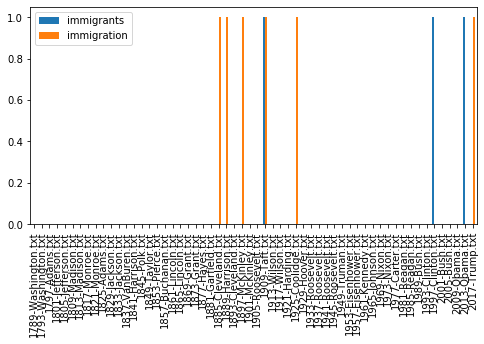

In [51]:
pd.DataFrame(wordsAndCounts, index=inauguralFileIDs).plot(kind='bar', figsize=(8, 4))

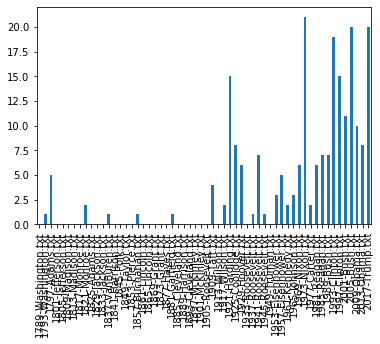

In [35]:
pd.Series(frequencyInAddress('America'), index=inauguralFileIDs).plot(kind='bar', figsize=())

# Make your own NLTK.Text() object

In [52]:
"the the the the".split()

['the', 'the', 'the', 'the']

In [54]:
# nltk.word_tokenize() # Takes a string, and returns tokens (~~words)

In [56]:
dublinersRaw = open('/home/jon/2814-0.txt').read()

In [58]:
type(dublinersRaw)

str

In [59]:
dublinersTokens = nltk.word_tokenize(dublinersRaw)

In [ ]:
'world,' 'world' 

In [61]:
dublinersText = nltk.Text(dublinersTokens)

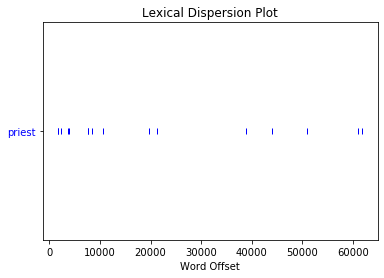

In [66]:
dublinersText.dispersion_plot(['priest'])

In [67]:
dublinersFreqs = nltk.FreqDist(dublinersText)

In [68]:
dublinersFreqs['priest']

16

In [72]:
dublinersRaw.count(' priest?')

0

In [76]:
sistersStart = dublinersRaw.index('THE SISTERS')

In [77]:
encounterStart = dublinersRaw.index('AN ENCOUNTER')

In [78]:
dublinersRaw[sistersStart:encounterStart]

'THE SISTERS\n\n\nThere was no hope for him this time: it was the third stroke. Night\nafter night I had passed the house (it was vacation time) and studied\nthe lighted square of window: and night after night I had found it\nlighted in the same way, faintly and evenly. If he was dead, I thought,\nI would see the reflection of candles on the darkened blind for I knew\nthat two candles must be set at the head of a corpse. He had often said\nto me: “I am not long for this world,” and I had thought his words\nidle. Now I knew they were true. Every night as I gazed up at the\nwindow I said softly to myself the word paralysis. It had always\nsounded strangely in my ears, like the word gnomon in the Euclid and\nthe word simony in the Catechism. But now it sounded to me like the\nname of some maleficent and sinful being. It filled me with fear, and\nyet I longed to be nearer to it and to look upon its deadly work.\n\nOld Cotter was sitting at the fire, smoking, when I came downstairs to\nsupp

In [86]:
def typeTokenRatio(words): 
    return len(set(words)) / len(words)

ttrs = [typeTokenRatio(words[:2000]) for words in inauguralWords]

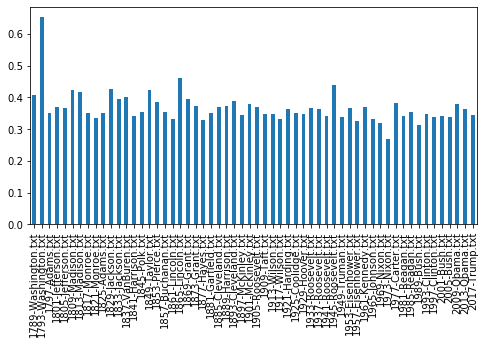

In [87]:
pd.Series(ttrs, index=inauguralFileIDs).plot(kind='bar', figsize=(8,4))

In [90]:
typeTokenRatio(dublinersTokens[:2000])

0.37

In [96]:
washingtonFreqs.hapaxes()

['Fellow',
 '-',
 'Citizens',
 'Senate',
 ':',
 'Among',
 'vicissitudes',
 'incident',
 'life',
 'filled',
 'greater',
 'anxieties',
 'notification',
 'transmitted',
 'received',
 '14th',
 'month',
 'summoned',
 'Country',
 'hear',
 'veneration',
 'had',
 'chosen',
 'fondest',
 'predilection',
 'flattering',
 'hopes',
 'decision',
 'asylum',
 'declining',
 'years',
 '--',
 'dear',
 'addition',
 'habit',
 'inclination',
 'frequent',
 'interruptions',
 'health',
 'gradual',
 'waste',
 'committed',
 'time',
 'other',
 'magnitude',
 'difficulty',
 'called',
 'sufficient',
 'awaken',
 'wisest',
 'experienced',
 'her',
 'distrustful',
 'scrutiny',
 'overwhelm',
 'despondence',
 '(',
 'inheriting',
 'inferior',
 'endowments',
 'unpracticed',
 'duties',
 'civil',
 ')',
 'conscious',
 'deficiencies',
 'conflict',
 'emotions',
 'aver',
 'faithful',
 'study',
 'collect',
 'appreciation',
 'circumstance',
 'affected',
 'All',
 'hope',
 'if',
 'executing',
 'task',
 'much',
 'swayed',
 'grateful',
